<a href="https://colab.research.google.com/github/marcorrea1/AAI2026/blob/main/Part_3_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded: (180, 4)


,annual_spending,purchase_frequency,age,region
0,3610,9,67,South
1,2743,21,42,West
2,998,5,28,East
3,727,5,34,East
4,4821,19,44,North


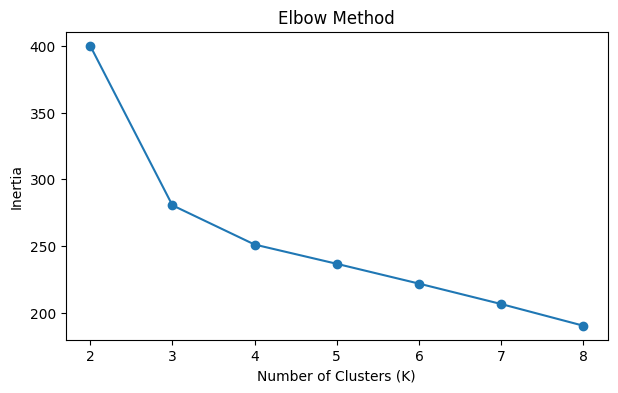

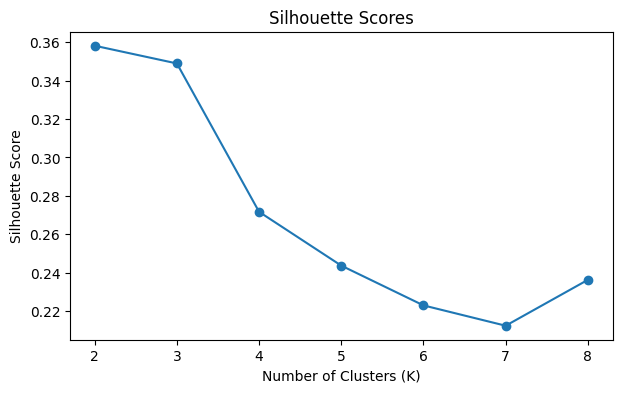

Selected number of clusters (K): 2

Cluster averages:


,annual_spending,purchase_frequency,age
cluster,,,
0,1037.52,6.38,30.92
1,3459.43,17.01,45.53


Marketing strategies by cluster:
Cluster 0: Re-engagement and personalized promotions
Cluster 1: VIP rewards and exclusive offers

Cluster results saved.


In [10]:
# Part 3: Customer Segmentation using K-Means
# Data source: customer_segmentation_data.csv
# Used Chatgbt SJSU to generate file for this assignment


import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

# Load the customer dataset
df = pd.read_csv("customer_segmentation_data.csv")
print("Dataset loaded:", df.shape)
display(df.head())

# Define numerical and categorical features
numeric_features = ["annual_spending", "purchase_frequency", "age"]
categorical_features = ["region"]

# Scale numerical features and encode the categorical region feature
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Combine selected features for clustering
X = df[numeric_features + categorical_features]

# Evaluate multiple K values to find the best number of clusters
K_range = range(2, 9)
inertia = []
silhouette_scores = []

for k in K_range:
    model = Pipeline([
        ("preprocess", preprocessor),
        ("kmeans", KMeans(n_clusters=k, random_state=42, n_init=10))
    ])
    model.fit(X)

    # Inertia measures how compact the clusters are
    inertia.append(model.named_steps["kmeans"].inertia_)

    # Silhouette score measures how well clusters are separated
    labels = model.named_steps["kmeans"].labels_
    X_transformed = model.named_steps["preprocess"].transform(X)
    silhouette_scores.append(silhouette_score(X_transformed, labels))

# Elbow plot to visualize
plt.figure(figsize=(7, 4))
plt.plot(list(K_range), inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette plot to support the K selection
plt.figure(figsize=(7, 4))
plt.plot(list(K_range), silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()

# Select K with the highest silhouette score
optimal_k = list(K_range)[silhouette_scores.index(max(silhouette_scores))]
print(f"Selected number of clusters (K): {optimal_k}")

# Create a pipeline using K
final_model = Pipeline([
    ("preprocess", preprocessor),
    ("kmeans", KMeans(n_clusters=optimal_k, random_state=42, n_init=10))
])

df["cluster"] = final_model.fit_predict(X)

# Calculate average values
cluster_summary = df.groupby("cluster")[numeric_features].mean().round(2)
print("\nCluster averages:")
display(cluster_summary)

# Suggest marketing strategies based on cluster behavior
print("Marketing strategies by cluster:")
for c in cluster_summary.index:
    spend = cluster_summary.loc[c, "annual_spending"]
    freq = cluster_summary.loc[c, "purchase_frequency"]

    if spend > 3000 and freq > 15:
        strategy = "VIP rewards and exclusive offers"
    elif freq > 12:
        strategy = "Subscriptions and bundle discounts"
    else:
        strategy = "Re-engagement and personalized promotions"

    print(f"Cluster {c}: {strategy}")

# Save final clustering results for submission
df.to_csv("customer_segments.csv", index=False)
df.to_excel("customer_segments.xlsx", index=False)

print("\nCluster results saved.")


Part 3: Customer Segmentation

I used K-means clustering to group customers based on annual spending, purchase frequency, age, and region. The features were scaled so spending did not dominate the clustering. Using the Elbow method and silhouette score, I selected K = 2, where improvements in inertia began to level off and clusters were less close.

After clustering, one group had a higher average of around 3,400 and more frequent purchases, while the other was 1000 with fewer purchases. Based on this, I suggested VIP for those who spent more and special offers for lower-engaged customers to target the market better.
